# Loading the clean dataset

Import required libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("cleaned_ds.csv", low_memory=False)
df.head()

,Unnamed: 0,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,0,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,1,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,3,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,4,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583


# Adding a new feature

## City name using the longitude and latitude

We will use the reverse Geocoding mechanism in order to retrieve the address using the coordinates. Ref: https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6
Many sources on the internet suggests using Geopy library. However, the problem is that this library uses external service providers on the internet to get the address. Making a request for each entry in our dataset is a waste of time and resources. 
It's better to look for an offline alternative to do this reverse geocoding.

We will use a library called reverse geocoder as referenced here: https://github.com/thampiman/reverse-geocoder

In [3]:
%pip install reverse_geocoder

Note: you may need to restart the kernel to use updated packages.


Let's look at a sample output of the query.

In [4]:
import reverse_geocoder as rg

coordinates = [(51.5214588,-0.1729636)]
results = rg.search(coordinates) # default mode = 2
print(results)

Loading formatted geocoded file...
[{'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}]


The output has different regions of the address. We are mainly interested in the city (county) name which is admin2 in this case containing "Greater London".

Let's get the addresses of all dataset rows

In [5]:
coordinates = list(zip(df.latitude, df.longitude))
results = rg.search(coordinates) # default mode = 2
print(results[:10])

[{'lat': '51.6128', 'lon': '-0.27539', 'name': 'Edgware', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.48315', 'lon': '0.17484', 'name': 'Erith', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.5489', 'lon': '-0.48211', 'name': 'Uxbridge', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.40322', 'lon': '-0.16831', 'name': 'Mitcham', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.51579', 'lon': '-0.4234', 'name': 'Hayes', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.38333', 'lon': '-0.1', 'name': 'Croydon', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.51116', 'lon': '-0.18426', 'name': 'Bayswater', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.6', 'lon': '-0.21667', 'name': 'Hendon', 'admin1': 'England', 'admin2': 'Greater London', 'cc': 'GB'}, {'lat': '51.50094', 'lon': '-0.19175', 'name': 'Kensi

Extract the city names from the address "admin2".

In [6]:
cities = list(map(lambda res: res['admin2'], results))
df["city"] = cities
df["city"].value_counts()

Greater London      24269
Kent                 4986
Surrey               3736
Essex                3190
Hampshire            3143
                    ...  
Blaenau Gwent          70
Shetland Islands       26
Orkney Islands         25
Eilean Siar            25
Isles of Scilly         1
Name: city, Length: 174, dtype: int64

In [7]:
df.head()

,Unnamed: 0,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,city
0,0,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,1,...,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543,Greater London
1,1,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,1,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375,Greater London
2,2,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,1,...,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725,Greater London
3,3,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,1,...,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379,Greater London
4,4,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,1,...,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583,Greater London


# Encode the city name using label encoding (and add to lookup table)

### Apply label encoding step

In [8]:
from sklearn import preprocessing
city_labels = preprocessing.LabelEncoder().fit_transform(df["city"])

### Saving labels to look up table

In [9]:
cities_dataFrame = pd.DataFrame()
cities_dataFrame["city"]=df["city"]
cities_dataFrame["label"]=city_labels
cities_dataFrame.head(2)

,city,label
0,Greater London,79
1,Greater London,79


### Saving dataFrame to a new csv file

In [10]:
cities_dataFrame.to_csv("cities_labels")

# Ask 2 question about the feature and visualize the answer

In [58]:
def plotTop5freqValues(df,column_name,label,left_range=0,right_range=5):
    plot_df=df[column_name].value_counts()
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))
    plot_df[left_range:right_range].plot.bar(ax=ax1)
    ax1.set_title(label)
    plt.show()

By knowing the cites where the accident happened, we should ask investigate
### What is the most city that has accidents in 2016?

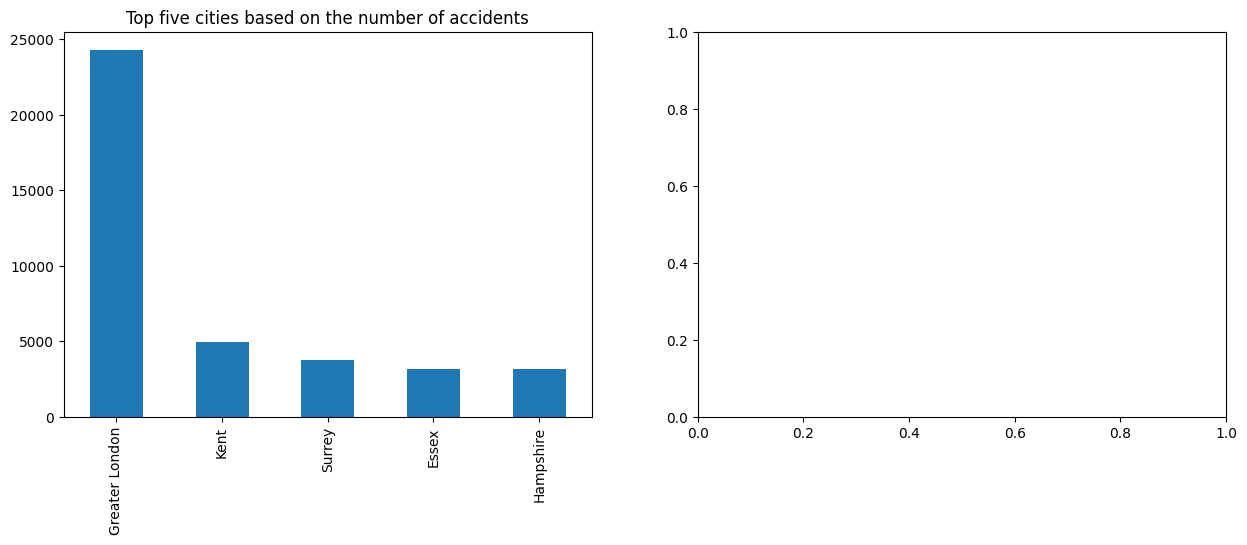

In [59]:
plotTop5freqValues(df,"city","Top five cities based on the number of accidents")

We can conclude that ***Greater London*** the city that has most number of accidents

We can also think in at
### What is the highest first road number based on the number of accidents

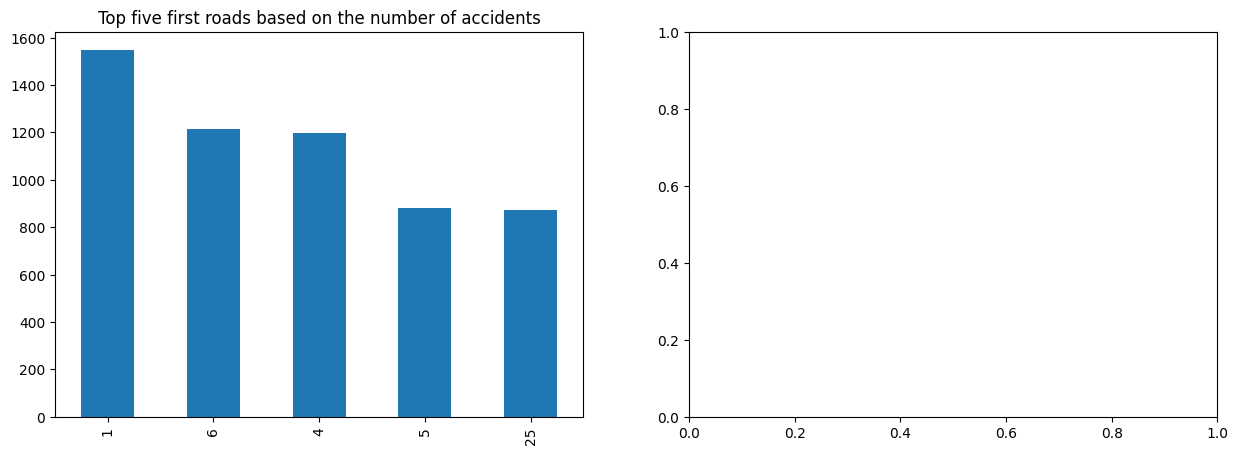

In [60]:
plotTop5freqValues(df,"first_road_number","Top five first roads based on the number of accidents",left_range=1,right_range=6)

We can observe First road with number ***1*** is the highest road in number of accidents

In [61]:
df.city.loc[df.index[df["first_road_number"]=='1'][0]]

'Greater London'

***And this road is located at london***